# Project: Investigate a Dataset (TMDb Movie Data)
The content of this notebook is the original work of Xavier López done as a project from the *Data Analysis* Udacity's.nanodegree.

The goal of the notebook is to do data analysis on a given dataset and answer data-related questions using python data manipulation and visualization.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


>The aim of this notebook is to investigate a given data set, play with the data and answer research questions on the way. 
>The data set choice has been 
<a href="https://www.google.com/url?q=https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv&sa=D&ust=1532469042115000">The Movie Database (TMDb)</a>. This dataset contains data cleaned from an orignal <a href = "https://www.kaggle.com/tmdb/tmdb-movie-metadata"> "Kaggle dataset" </a>.
>
>The sutdied dataset contains information about 10,000 movies collected from The Movie Database (TMDb), including genre, cast, release_year, user ratings and revenue.

>The research questions I have been interested on answering can be classified in two categories:
- **Genre/Cast based**:
>>**RQ1:** Which genres have a greater average vote form year to year?
>>
>>**RQ2:** What distribution of genres does the dataset present? 
>>
>>**RQ3:** How was the distribution in the most recent year? How was in the latest year?
>>
>>**RQ4**: How has the distribution evolved during the years? did all genres grow in the same rate? 
>>
>>**RQ5:** What are the top 5 more frequent genres on the dataset?
>>
>>**RQ6:** For each of those top 5 genres, report the name of the three cast members that appear in more movies of the given genre, and the number of movies in which they appear.
>
>- **Revenue based**:
>>**RQ7:** What genres are more profitable (profit = revenue - budget)?
>>
>>**RQ8:** From the most profitable genre, which *producer* has the most profitable average film production?

In [93]:
import pandas as pd

#data viz:
import matplotlib.pyplot as plt #basic
import altair as alt #interactive
import pylab as pl #useful to include titles 

%matplotlib inline

<a id='wrangling'></a>
## Data Cleaning

> In this section of the report, data is loaded, checked for cleanliness and then we proceede to trim and clean the dataset for analysis.
>
> The tasks that will be done are:
> - Drop unnecessary features
> - Drop duplicates and NaNs for the "imdb_id" 

### General Properties

> Before proceeding, we list the fields that we will need to answer the research questions:
> - movie name
> - genre
> - year of release
> - average vote
> - cast members
> - revenue
> - budget
> - producer
>
>Lets get started reading the data:





In [94]:
df = pd.read_csv("data/tmdb-movies.csv")
df.set_index("id", inplace = True)
df.head(10).T

id,135397,76341,262500,140607,168259,281957,87101,286217,211672,150540
imdb_id,tt0369610,tt1392190,tt2908446,tt2488496,tt2820852,tt1663202,tt1340138,tt3659388,tt2293640,tt2096673
popularity,32.9858,28.4199,13.1125,11.1731,9.33501,9.1107,8.65436,7.6674,7.40416,6.3268
budget,150000000,150000000,110000000,200000000,190000000,135000000,155000000,108000000,74000000,175000000
revenue,1513528810,378436354,295238201,2068178225,1506249360,532950503,440603537,595380321,1156730962,853708609
original_title,Jurassic World,Mad Max: Fury Road,Insurgent,Star Wars: The Force Awakens,Furious 7,The Revenant,Terminator Genisys,The Martian,Minions,Inside Out
cast,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...
homepage,http://www.jurassicworld.com/,http://www.madmaxmovie.com/,http://www.thedivergentseries.movie/#insurgent,http://www.starwars.com/films/star-wars-episod...,http://www.furious7.com/,http://www.foxmovies.com/movies/the-revenant,http://www.terminatormovie.com/,http://www.foxmovies.com/movies/the-martian,http://www.minionsmovie.com/,http://movies.disney.com/inside-out
director,Colin Trevorrow,George Miller,Robert Schwentke,J.J. Abrams,James Wan,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,Alan Taylor,Ridley Scott,Kyle Balda|Pierre Coffin,Pete Docter
tagline,The park is open.,What a Lovely Day.,One Choice Can Destroy You,Every generation has a story.,Vengeance Hits Home,"(n. One who has returned, as if from the dead.)",Reset the future,Bring Him Home,"Before Gru, they had a history of bad bosses",Meet the little voices inside your head.
keywords,monster|dna|tyrannosaurus rex|velociraptor|island,future|chase|post-apocalyptic|dystopia|australia,based on novel|revolution|dystopia|sequel|dyst...,android|spaceship|jedi|space opera|3d,car race|speed|revenge|suspense|car,father-son relationship|rape|based on novel|mo...,saving the world|artificial intelligence|cybor...,based on novel|mars|nasa|isolation|botanist,assistant|aftercreditsstinger|duringcreditssti...,dream|cartoon|imaginary friend|animation|kid


>Drop the columns that are not relevant to answer the research questions:

In [95]:
df.drop(['popularity','homepage','tagline','keywords','overview','runtime','vote_count','release_date','revenue_adj','budget_adj'], axis = 1, inplace = True)
df.columns

Index(['imdb_id', 'budget', 'revenue', 'original_title', 'cast', 'director',
       'genres', 'production_companies', 'vote_average', 'release_year'],
      dtype='object')

>Note that the dataset has two columns "id" and "imdb_id". Since the source of "id" is unclear but the source of "imdb_id" is not (it corresponts to the www.imdb.com database id) we will use "imdb_id".
>
>Cheacking for cleanliness we must make sure this "imdb_id" is not repeated or null in our studied dataset:

In [96]:
df['imdb_id'].duplicated().any()

True

In [97]:
df[df['imdb_id'].duplicated()]['imdb_id']

id
287663          NaN
15257           NaN
101907          NaN
42194     tt0411951
45644           NaN
369145          NaN
269177          NaN
279954          NaN
50127           NaN
50128           NaN
Name: imdb_id, dtype: object

In [98]:
len(df[df['imdb_id'].duplicated()]['imdb_id'])

10

In [99]:
df[df['imdb_id'].duplicated()].T.head(5)

id,287663,15257,101907,42194,45644,369145,269177,279954,50127,50128
imdb_id,NaN,NaN,NaN,tt0411951,NaN,NaN,NaN,NaN,NaN,NaN
budget,0,0,0,30000000,0,0,0,500,0,0
revenue,0,0,0,967000,0,0,0,0,0,0
original_title,Star Wars Rebels: Spark of Rebellion,Hulk vs. Wolverine,Hulk vs. Thor,TEKKEN,Opeth: In Live Concert At The Royal Albert Hall,Doctor Who: The Snowmen,Party Bercy,Portal: Survive!,Fallen: The Journey,Fallen: The Destiny
cast,Freddie Prinze Jr.|Vanessa Marshall|Steve Blum...,Fred Tatasciore|Bryce Johnson|Steve Blum|Nolan...,Graham McTavish|Fred Tatasciore|Matthew Wolf|J...,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,"Mikael Ã…kerfeldt|Martin ""Axe"" Axenrot|Martin ...",Matt Smith|Jenna Coleman|Richard E. Grant|Ian ...,Florence Foresti,Monique Blanchard|Bradley Mixon,Paul Wesley|Fernanda Andrade|Tom Skerritt|Rick...,Paul Wesley|Fernanda Andrade|Tom Skerritt|Rick...


In [100]:
print("Number of NaN at imdb_id colunn:")
nans_imdbid = len(df[df['imdb_id'].isna()]['imdb_id'])
nans_imdbid

Number of NaN at imdb_id colunn:


10

In [101]:
print("Total number of film entries:")
df.shape[0]

Total number of film entries:


10866

In [102]:
print("% of NaN's at imdb_id compared to the total number of entries of the dataset")
(nans_imdbid/df.shape[0])*100

% of NaN's at imdb_id compared to the total number of entries of the dataset


0.09203018590097553

> Since the number of duplicates in the imdb_id column represent less than 0.1% of the total of entries of the dataset, and they do not seem to have any meaningful reason to exist, those rows will be dropped:

In [103]:
df.dropna(subset=['imdb_id'], inplace=True)

> We have droped NaN's, we should also drop duplicates

In [104]:
df[df['imdb_id'].duplicated()]

,imdb_id,budget,revenue,original_title,cast,director,genres,production_companies,vote_average,release_year
id,,,,,,,,,,
42194,tt0411951,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,5.0,2010


In [105]:
df.drop_duplicates(subset = "imdb_id", keep = "first", inplace = True)

> Now the dataset contains only unique id's on the "imdb_id" column and no NANs on that column.
>
> Lets doublecheck that this statement is correct:

In [106]:
df[df['imdb_id'].duplicated()]

,imdb_id,budget,revenue,original_title,cast,director,genres,production_companies,vote_average,release_year
id,,,,,,,,,,


In [107]:
df[df['imdb_id'].isna()]

,imdb_id,budget,revenue,original_title,cast,director,genres,production_companies,vote_average,release_year
id,,,,,,,,,,


>Lets explore the size of the dataset

In [108]:
df.shape

(10855, 10)

>Our dataset contains 10855 different movies.
>
>Check the missing values:

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10855 entries, 135397 to 22293
Data columns (total 10 columns):
imdb_id                 10855 non-null object
budget                  10855 non-null int64
revenue                 10855 non-null int64
original_title          10855 non-null object
cast                    10779 non-null object
director                10815 non-null object
genres                  10834 non-null object
production_companies    9830 non-null object
vote_average            10855 non-null float64
release_year            10855 non-null int64
dtypes: float64(1), int64(3), object(6)
memory usage: 932.9+ KB


> Note that we only have problems of missing values on the features *cast*,director,genres* and *production_companies*. 
>
>Before dropping, lets check if there is overlap of missing values and what is the number of total rows that contain some missing value:

In [110]:
def nans(df): return df[df.isnull().any(axis=1)]

In [111]:
df_nans = nans(df)
df_nans.shape

(1085, 10)

In [112]:
df_nans.shape[0]/df.shape[0]

0.09995393827729157

>Note that almost 10% of our dataset contains some missing data, this is too great to discard it without any analysis, lets explore a bit the data distribution:

Text(0.5,0.98,'Data distribution of entries containing some NaN')

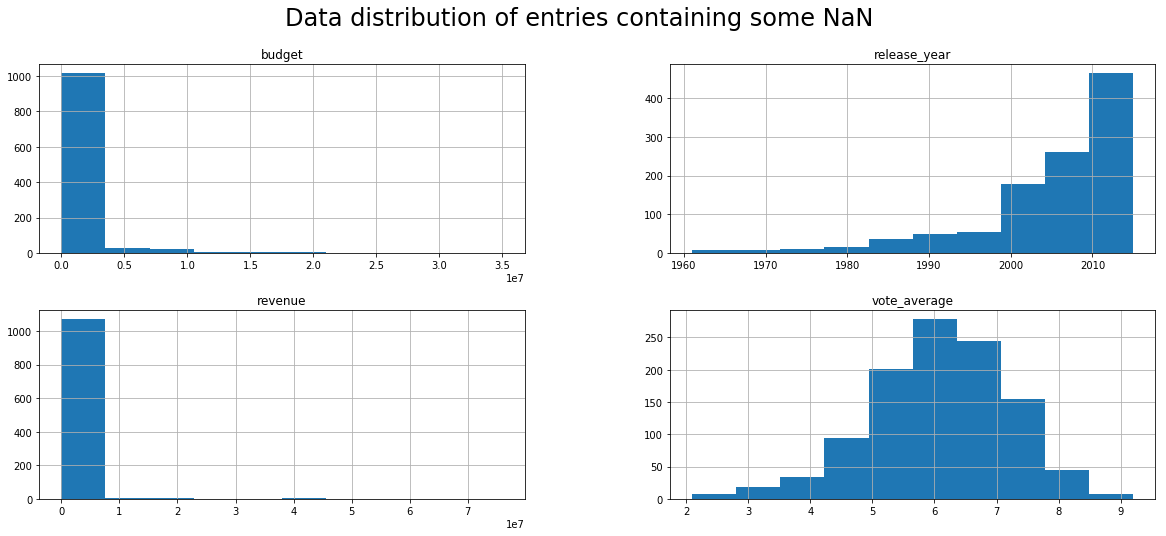

In [123]:
df_nans.hist(figsize = (20,8))
pl.suptitle('Data distribution of entries containing some NaN', fontsize=24)

>Note that the revenue and budget for those films are very concentrated to zero, which would be equivalent of not being informed.
>
>asdf

In [128]:
df_ff =  df.dropna(how='any') #ff = fully filled
df_ff.describe()

,budget,revenue,vote_average,release_year
count,9.770000e+03,9.770000e+03,9770.000000,9770.000000
mean,1.618298e+07,4.424026e+07,5.963388,2000.876766
std,3.221320e+07,1.225998e+08,0.913207,13.037610
min,0.000000e+00,0.000000e+00,1.500000,1960.000000
25%,0.000000e+00,0.000000e+00,5.400000,1994.000000
50%,2.000000e+05,0.000000e+00,6.000000,2005.000000
75%,1.936250e+07,3.105779e+07,6.600000,2011.000000
max,4.250000e+08,2.781506e+09,8.700000,2015.000000


Text(0.5,0.98,'Data distribution of entries that do NOT contain any NaN')

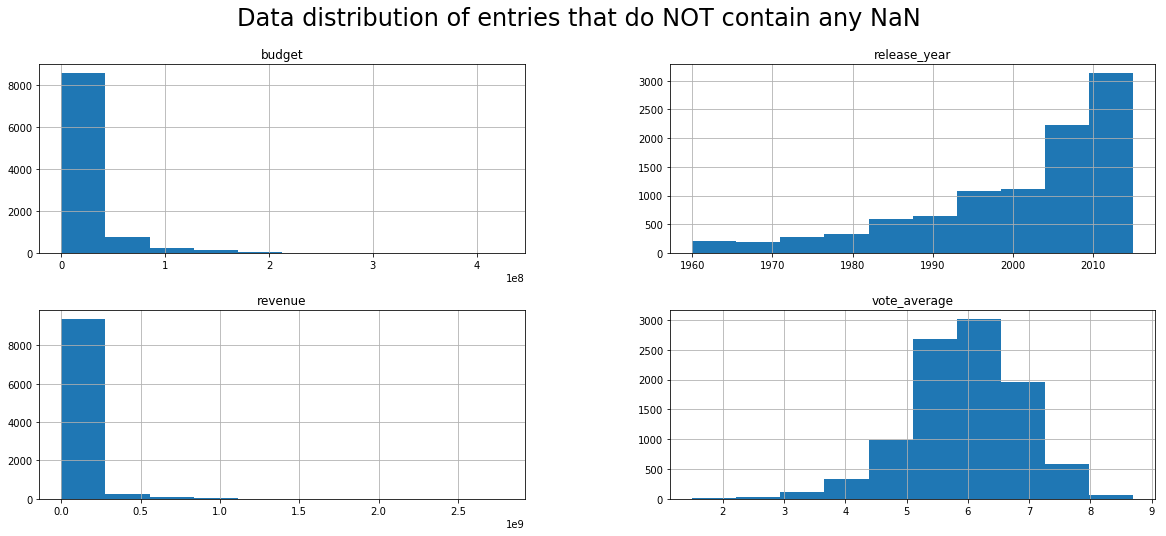

In [125]:
df_ff.hist(figsize = (20,8))
pl.suptitle('Data distribution of entries that do NOT contain any NaN', fontsize=24)

> Note that de data distribution of the data that contain missing values vs the rest of it is not very different therefore for simplicit we willd rop the entries that contain some missing values:



In [129]:
df = df_ff

>From the previoius ditribution charts one can note that there are a lot of movies with a budget and/or revenue equal to zero.
>
>Lets count them:

In [163]:
df_z = df[(df.budget==0) | (df.revenue == 0)]
df_z.shape

(5965, 10)

In [164]:
df_z.shape[0]/df.shape[0]

0.6105424769703173

>Note that now the entries that contain budget or revenue equal to zero represent 60% of the dataset.
>
>Lets check their distribution and compare it to the entries with a budget and revenue greater than zero

In [165]:
df_ff.describe()

,budget,revenue,vote_average,release_year
count,9.770000e+03,9.770000e+03,9770.000000,9770.000000
mean,1.618298e+07,4.424026e+07,5.963388,2000.876766
std,3.221320e+07,1.225998e+08,0.913207,13.037610
min,0.000000e+00,0.000000e+00,1.500000,1960.000000
25%,0.000000e+00,0.000000e+00,5.400000,1994.000000
50%,2.000000e+05,0.000000e+00,6.000000,2005.000000
75%,1.936250e+07,3.105779e+07,6.600000,2011.000000
max,4.250000e+08,2.781506e+09,8.700000,2015.000000


Text(0.5,0.98,'Data distribution of films with revenue or budget equal to zero')

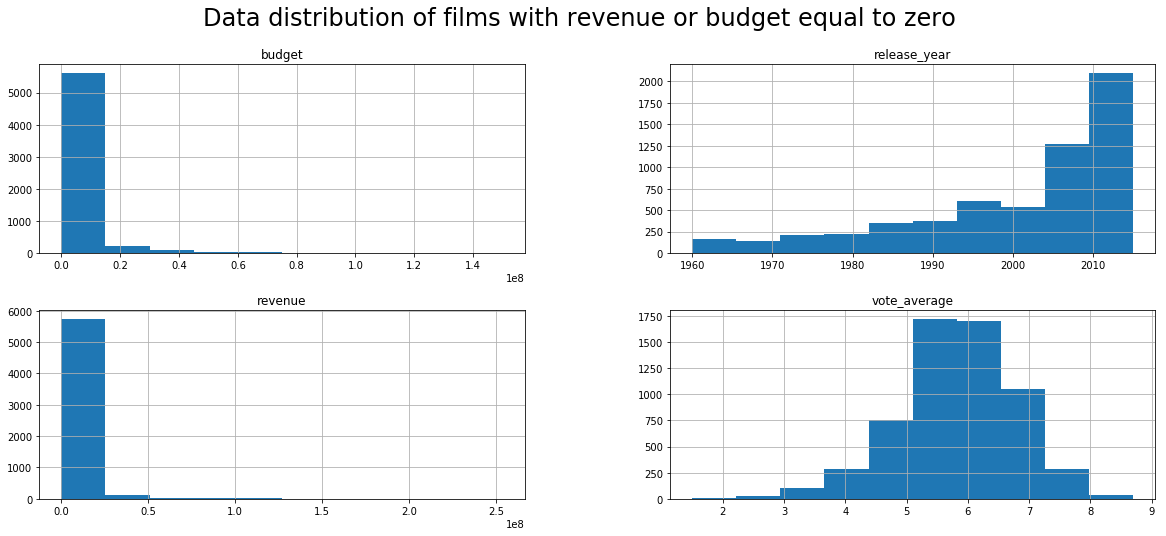

In [167]:
df_z.hist(figsize = (20,8))
pl.suptitle('Data distribution of films with revenue or budget equal to zero', fontsize=24)

Text(0.5,0.98,'Data distribution of films with revenue and budget greater than zero')

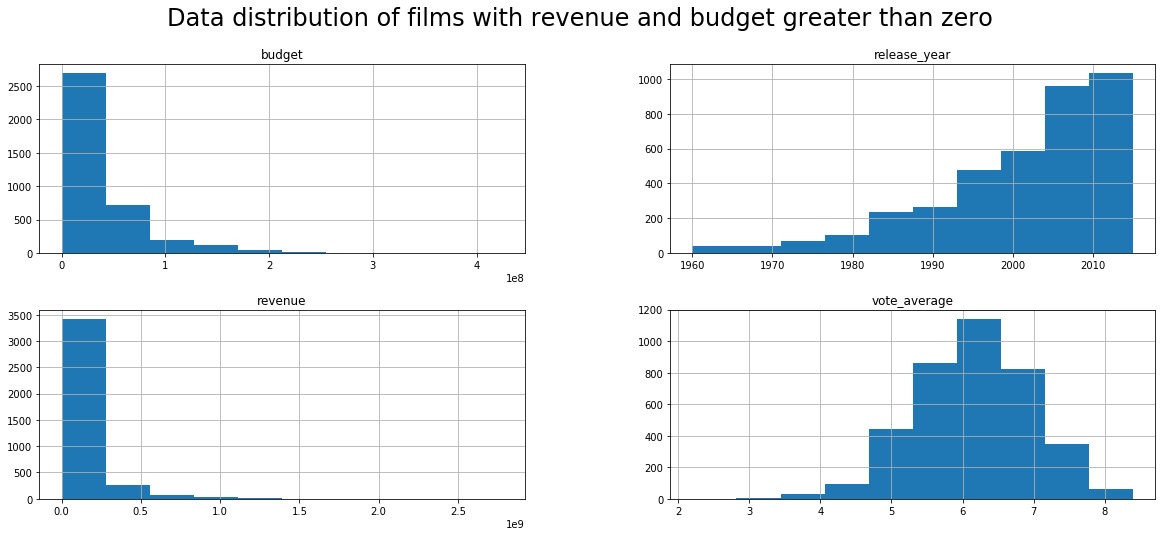

In [168]:
df_nz = df[(df.budget>0) & (df.revenue > 0)]
df_nz.hist(figsize = (20,8))
pl.suptitle('Data distribution of films with revenue and budget greater than zero', fontsize=24)

>Since we do not see a big change in the distribution we remove those movies, yet its important to recall that we have dropped more than 60% of our original dataset to remove entris containing miss informative values (zeros in revenu and budget) and missing values.

In [169]:
df = df_nz

In [170]:
df.describe()

,budget,revenue,vote_average,release_year
count,3.805000e+03,3.805000e+03,3805.000000,3805.000000
mean,3.760800e+07,1.089734e+08,6.170565,2001.229172
std,4.232179e+07,1.772976e+08,0.792437,11.329616
min,1.000000e+00,2.000000e+00,2.200000,1960.000000
25%,1.000000e+07,1.433379e+07,5.700000,1995.000000
50%,2.500000e+07,4.621664e+07,6.200000,2004.000000
75%,5.000000e+07,1.260695e+08,6.700000,2010.000000
max,4.250000e+08,2.781506e+09,8.400000,2015.000000


In [171]:
df.shape

(3805, 10)

Finally we have a dataset of 3800 movies fully informed and ready to answer the research questions

In [172]:
df.T

id,135397,76341,262500,140607,168259,281957,87101,286217,211672,150540,...,9584,11850,24961,10766,11837,396,5780,6644,5923,2161
imdb_id,tt0369610,tt1392190,tt2908446,tt2488496,tt2820852,tt1663202,tt1340138,tt3659388,tt2293640,tt2096673,...,tt0077369,tt0077745,tt0078504,tt0077394,tt0078480,tt0061184,tt0061107,tt0061619,tt0060934,tt0060397
budget,150000000,150000000,110000000,200000000,190000000,135000000,155000000,108000000,74000000,175000000,...,12000000,3500000,24000000,6800000,1000000,7500000,3000000,4653000,12000000,5115000
revenue,1513528810,378436354,295238201,2068178225,1506249360,532950503,440603537,595380321,1156730962,853708609,...,22765081,24046533,21049053,26518355,3713768,33736689,13000000,6000000,20000000,12000000
original_title,Jurassic World,Mad Max: Fury Road,Insurgent,Star Wars: The Force Awakens,Furious 7,The Revenant,Terminator Genisys,The Martian,Minions,Inside Out,...,Convoy,Invasion of the Body Snatchers,The Wiz,Damien: Omen II,Watership Down,Who's Afraid of Virginia Woolf?,Torn Curtain,El Dorado,The Sand Pebbles,Fantastic Voyage
cast,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,...,Kris Kristofferson|Ali MacGraw|Ernest Borgnine...,Donald Sutherland|Brooke Adams|Leonard Nimoy|V...,Diana Ross|Michael Jackson|Nipsey Russell|Ted ...,William Holden|Lee Grant|Jonathan Scott-Taylor...,John Hurt|Richard Briers|Michael Graham Cox|Jo...,Elizabeth Taylor|Richard Burton|George Segal|S...,Paul Newman|Julie Andrews|Lila Kedrova|HansjÃ¶...,John Wayne|Robert Mitchum|James Caan|Charlene ...,Steve McQueen|Richard Attenborough|Richard Cre...,Stephen Boyd|Raquel Welch|Edmond O'Brien|Donal...
director,Colin Trevorrow,George Miller,Robert Schwentke,J.J. Abrams,James Wan,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,Alan Taylor,Ridley Scott,Kyle Balda|Pierre Coffin,Pete Docter,...,Sam Peckinpah,Philip Kaufman,Sidney Lumet,Don Taylor|Mike Hodges,Martin Rosen,Mike Nichols,Alfred Hitchcock,Howard Hawks,Robert Wise,Richard Fleischer
genres,Action|Adventure|Science Fiction|Thriller,Action|Adventure|Science Fiction|Thriller,Adventure|Science Fiction|Thriller,Action|Adventure|Science Fiction|Fantasy,Action|Crime|Thriller,Western|Drama|Adventure|Thriller,Science Fiction|Action|Thriller|Adventure,Drama|Adventure|Science Fiction,Family|Animation|Adventure|Comedy,Comedy|Animation|Family,...,Action|Comedy|Drama,Horror|Thriller|Science Fiction|Mystery,Adventure|Family|Fantasy|Music|Science Fiction,Action|Drama|Horror|Thriller,Adventure|Animation|Drama,Drama,Mystery|Thriller,Action|Western,Action|Adventure|Drama|War|Romance,Adventure|Science Fiction
production_companies,Universal Studios|Amblin Entertainment|Legenda...,Village Roadshow Pictures|Kennedy Miller Produ...,Summit Entertainment|Mandeville Films|Red Wago...,Lucasfilm|Truenorth Productions|Bad Robot,Universal Pictures|Original Film|Media Rights ...,Regency Enterprises|Appian Way|CatchPlay|Anony...,Paramount Pictures|Skydance Productions,Twentieth Century Fox Film Corporation|Scott F...,Universal Pictures|Illumination Entertainment,Walt Disney Pictures|Pixar Animation Studios|W...,...,EMI Films Ltd.,United Artists|Solofilm,Universal Pictures|Motown Productions,Twentieth Century Fox Film Corporation|Mace Ne...,Nepenthe Productions|Watership Productions,Chenault Productions,Universal Pictures,Paramount Pictures|Laurel Productions,Twentieth Century Fox Film Corporation|Solar P...,Twentieth Century Fox Film Corporation
vote_average,6.5,7.1,6.3,7.5,7.3,7.2,5.8,7.6,6.5,8,...,6.2,6.5,6.1,6.1,6.8,7.5,6.3,6.9,7,6.7
release_year,2015,2015,2015,2015,2015,2015,20

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Replace this header name!)

In [ ]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


### Research Question 2  (Replace this header name!)

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!